<a href="https://colab.research.google.com/github/annasli378/Fat-Cells-Morphology/blob/main/cell_features_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTS
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import cv2,sys
from tqdm import tqdm
import scipy.io as sio
from scipy.spatial import Delaunay, delaunay_plot_2d, Voronoi, voronoi_plot_2d
from scipy.stats import skew, kurtosis
import seaborn as sns
import scipy.stats
from scipy.stats import ranksums

In [3]:
pth = '/content/drive/MyDrive/FAT_CELLS/'

pac_means = pd.read_csv('/content/drive/MyDrive/FAT_CELLS/Pac_features.csv')
pac_outcomes = pd.read_csv('/content/drive/MyDrive/FAT_CELLS/outcomes.csv')

In [4]:
pac_group = pac_means.groupby('patient_name')['areas'].agg(list).reset_index()
pac_group['background']  = pac_means.groupby('patient_name')['background'].agg(list).reset_index()['background']
pac_group['distants']  = pac_means.groupby('patient_name')['distants'].agg(list).reset_index()['distants']
pac_group['flatness']  = pac_means.groupby('patient_name')['flatness'].agg(list).reset_index()['flatness']

In [5]:
def clean_strings(row):
    cleaned_strings = []
    for s in row:
        cleaned = s.replace("[", "").replace("]", "")
        cleaned_strings.append(cleaned)
    return cleaned_strings

# Function to convert cleaned strings to numpy arrays
def strings_to_numpy(cleaned_strings):
    arrays = []
    for s in cleaned_strings:
        # Split the string by comma and convert each value to float
        values = [float(value.strip()) for value in s.split(",")]
        # Convert the list of values to a numpy array and append to the list of arrays
        np_values = np.array(values)
        for val in np_values:
          arrays.append(val)
    return arrays

def quartile1(row):
    return np.percentile(row, 25)

def quartile3(row):
    return np.percentile(row, 75)


def get_statiscitc(df, name_csv):
    df['mean'] = df['clean'].apply(np.mean)
    df['median'] = df['clean'].apply(np.median)
    df['var'] = df['clean'].apply(np.var)
    df['std'] = df['clean'].apply(np.std)
    df['kurt']= df['clean'].apply(kurtosis)
    df['skew']= df['clean'].apply(skew)
    df['min']= df['clean'].apply(min)
    df['max']= df['clean'].apply(max)
    df['maxmin'] = df['max'] - df['min']
    df['Q1'] = df['clean'].apply(quartile1)
    df['Q3'] = df['clean'].apply(quartile3)
    df['Q']= (df['Q3']- df['Q1'])/2
    df.to_csv(pth + name_csv+ '.csv')
    return df


# Statistical measures from all features:

mean, quartiles, variance, std, kurtosis, skewness, maximum-minimum value range, quarterly deviation

In [6]:
pac_areas = pac_group[['patient_name','areas']]
pac_areas.loc[:,'clean'] = pac_areas['areas'].apply(clean_strings)
pac_areas.loc[:,'clean'] =  pac_areas['clean'].apply(strings_to_numpy)
pac_areas = get_statiscitc(pac_areas, "AREAS")

<ipython-input-6-14a93bf30e0f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pac_areas.loc[:,'clean'] = pac_areas['areas'].apply(clean_strings)
<ipython-input-5-2e86e4050236>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mean'] = df['clean'].apply(np.mean)


In [7]:
pac_background = pac_group[['patient_name','background']]
pac_background.loc[:,'clean'] = pac_background['background'].apply(clean_strings)
pac_background.loc[:,'clean'] =  pac_background['clean'].apply(strings_to_numpy)
pac_background = get_statiscitc(pac_background, "BACKGROUND")

<ipython-input-7-50f98253f12e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pac_background.loc[:,'clean'] = pac_background['background'].apply(clean_strings)
<ipython-input-5-2e86e4050236>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mean'] = df['clean'].apply(np.mean)


In [8]:
pac_distants = pac_group[['patient_name','distants']]
pac_distants.loc[:,('clean')] = pac_distants['distants'].apply(clean_strings)
pac_distants.loc[:,('clean')] =  pac_distants['clean'].apply(strings_to_numpy)
pac_distants = get_statiscitc(pac_distants, "DISTANCE")

<ipython-input-8-ec55d45ee3c2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pac_distants.loc[:,('clean')] = pac_distants['distants'].apply(clean_strings)
<ipython-input-5-2e86e4050236>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mean'] = df['clean'].apply(np.mean)


In [9]:
pac_flatness = pac_group[['patient_name','flatness']]
pac_flatness.loc[:,('clean')] = pac_flatness['flatness'].apply(clean_strings)
pac_flatness.loc[:,('clean')] =  pac_flatness['clean'].apply(strings_to_numpy)
pac_flatness = get_statiscitc(pac_flatness, "FLATNESS")

<ipython-input-9-c822d2854580>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pac_flatness.loc[:,('clean')] = pac_flatness['flatness'].apply(clean_strings)
<ipython-input-5-2e86e4050236>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mean'] = df['clean'].apply(np.mean)


# PEARSON CORRELATIONS

trying to check whether there is significant correlation between features and outcomes


In [10]:
pac_outcomes=pac_outcomes.rename(columns={"PatientNames": "patient_name"})
pac_outcomes[['AgeAtDiagnosis', 'AgeAtSurgery']] = pac_outcomes[['AgeAtDiagnosis', 'AgeAtSurgery']].apply(round)

In [11]:
pac_outcomes_area = pd.merge(pac_outcomes, pac_areas, on='patient_name', how='inner')
pac_outcomes_bck = pd.merge(pac_outcomes, pac_background, on='patient_name', how='inner')
pac_outcomes_dist = pd.merge(pac_outcomes, pac_distants, on='patient_name', how='inner')
pac_outcomes_flat = pd.merge(pac_outcomes, pac_flatness, on='patient_name', how='inner')

In [12]:
pac_outcomes_area = pac_outcomes_area.drop(pac_outcomes_area.columns[0], axis=1)
pac_outcomes_bck = pac_outcomes_bck.drop(pac_outcomes_bck.columns[0], axis=1)
pac_outcomes_dist = pac_outcomes_dist.drop(pac_outcomes_dist.columns[0], axis=1)
pac_outcomes_flat = pac_outcomes_flat.drop(pac_outcomes_flat.columns[0], axis=1)

In [13]:
pac_ft = pac_outcomes_area[[ 'AgeAtDiagnosis','AgeAtSurgery', 'Surgery_No', 'Early_rec_withOUTi2ab_15mo', 'Early_rec_WITHi2ab_15mo', 'Any_rec_withOUT_i2ab_6mo', 'Any_rec_WITH_i2ab_6mo', 'RecurrentSurgery']]
pac_ft_arr = pac_outcomes_area[[ 'mean','median', 'var', 'std', 'kurt', 'skew', 'maxmin', 'Q1', 'Q3', 'Q']]
pac_ft_bck = pac_outcomes_bck[[ 'mean','median', 'var', 'std', 'kurt', 'skew', 'maxmin', 'Q1', 'Q3', 'Q']]
pac_ft_dst = pac_outcomes_dist[[ 'mean','median', 'var', 'std', 'kurt', 'skew', 'maxmin', 'Q1', 'Q3', 'Q']]
pac_ft_flt = pac_outcomes_flat[[ 'mean','median', 'var', 'std', 'kurt', 'skew', 'maxmin', 'Q1', 'Q3', 'Q']]


In [14]:
def pearson_columnwise(ft1, ft_tested):
    results = []
    for column in ft1.columns.tolist():
        for column_tested in ft_tested.columns.tolist():
            x = ft1[column]
            y = ft_tested[column_tested]
            idxnan_x, idxnan_y = x.isna(), y.isna()

            merged_indices = idxnan_x + idxnan_y
            flipped_values = ~merged_indices

            pearson_result =scipy.stats.pearsonr(x[flipped_values],y[flipped_values] )
            results.append({'Patient_ft': column,
                            'Cell_ft': column_tested,
                            'pearson_corr_coef': pearson_result[0],
                             'p_value':  pearson_result[1]})
    return pd.DataFrame(results)


In [15]:
corr_areas = pearson_columnwise(pac_ft, pac_ft_arr)
corr_background = pearson_columnwise(pac_ft, pac_ft_bck)
corr_distances = pearson_columnwise(pac_ft, pac_ft_dst)
corr_flatness = pearson_columnwise(pac_ft, pac_ft_flt)


Drop all pairs that p-value is >= 0.05

In [16]:
alpha = 0.05
corr_areas = corr_areas[corr_areas['p_value']<alpha]
corr_background = corr_background[corr_background['p_value']<alpha]
corr_distances = corr_distances[corr_distances['p_value']<alpha]
corr_flatness = corr_flatness[corr_flatness['p_value']<alpha]

In [17]:
corr_areas

,Patient_ft,Cell_ft,pearson_corr_coef,p_value
10,AgeAtSurgery,mean,0.449204,0.001739
11,AgeAtSurgery,median,0.345524,0.018677
12,AgeAtSurgery,var,0.427912,0.003012
13,AgeAtSurgery,std,0.481399,0.000707
18,AgeAtSurgery,Q3,0.463245,0.001187
19,AgeAtSurgery,Q,0.503845,0.000357


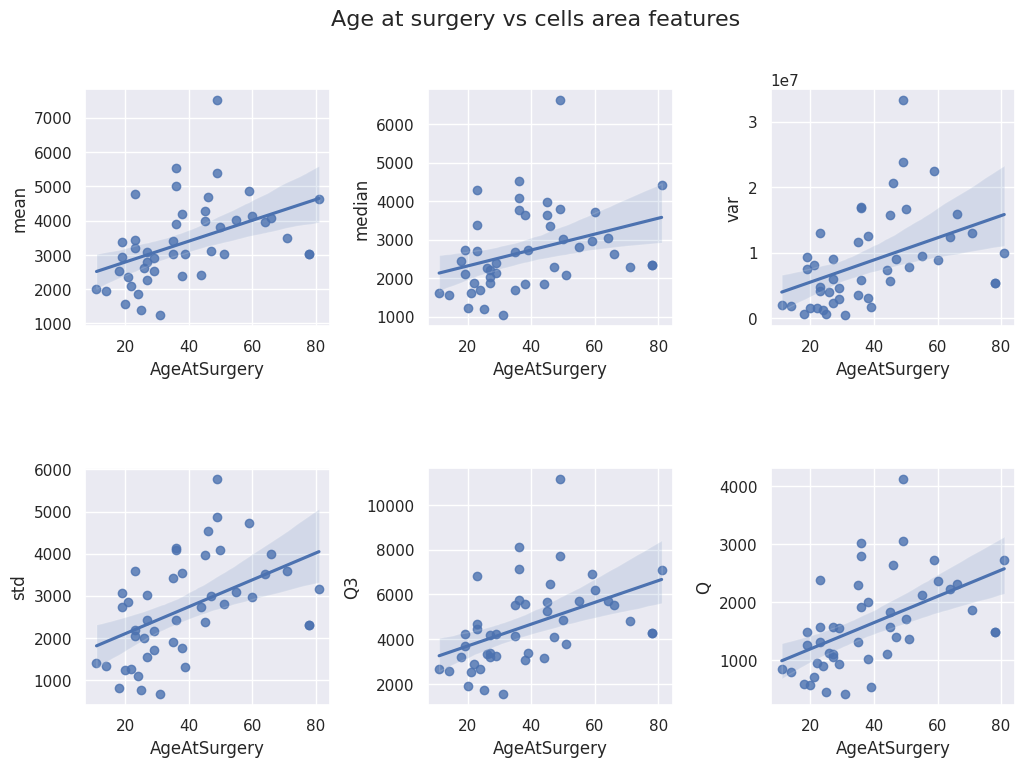

In [65]:
sns.set_theme(rc={'figure.figsize':(12,8)})

fig, axs = plt.subplots(ncols=3, nrows=2)
for i in range(0,6):
    i_x = i // 3
    i_y = i % 3
    x_name = corr_areas['Patient_ft'].values[i]
    y_name = corr_areas['Cell_ft'].values[i]
    sns.regplot(x=x_name, y=y_name, data=pac_outcomes_area, ax=axs[i_x, i_y])

fig.suptitle('Age at surgery vs cells area features', fontsize=16)
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.show()

In [19]:
corr_background

,Patient_ft,Cell_ft,pearson_corr_coef,p_value
0,AgeAtDiagnosis,mean,-0.325423,0.031121
5,AgeAtDiagnosis,skew,-0.373233,0.038633
8,AgeAtDiagnosis,Q3,-0.339790,0.024031
10,AgeAtSurgery,mean,-0.409075,0.004761
11,AgeAtSurgery,median,-0.362991,0.013161
13,AgeAtSurgery,std,-0.360161,0.013947
15,AgeAtSurgery,skew,-0.383221,0.030388
16,AgeAtSurgery,maxmin,-0.390236,0.007338
17,AgeAtSurgery,Q1,-0.316465,0.032136
18,AgeAtSurgery,Q3,-0.448794,0.001758


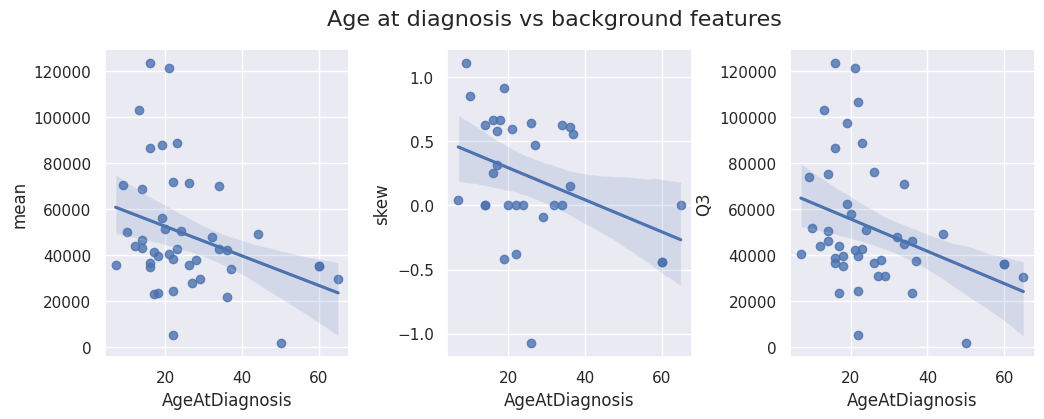

In [20]:
sns.set_theme(rc={'figure.figsize':(12,4)})
fig, axs = plt.subplots(ncols=3, nrows=1)
for i in range(0,3):
    x_name = corr_background['Patient_ft'].values[i]
    y_name = corr_background['Cell_ft'].values[i]
    sns.regplot(x=x_name, y=y_name, data=pac_outcomes_bck, ax=axs[i])

plt.subplots_adjust(wspace=0.4, hspace=0.6)
fig.suptitle('Age at diagnosis vs background features', fontsize=16)
plt.show()

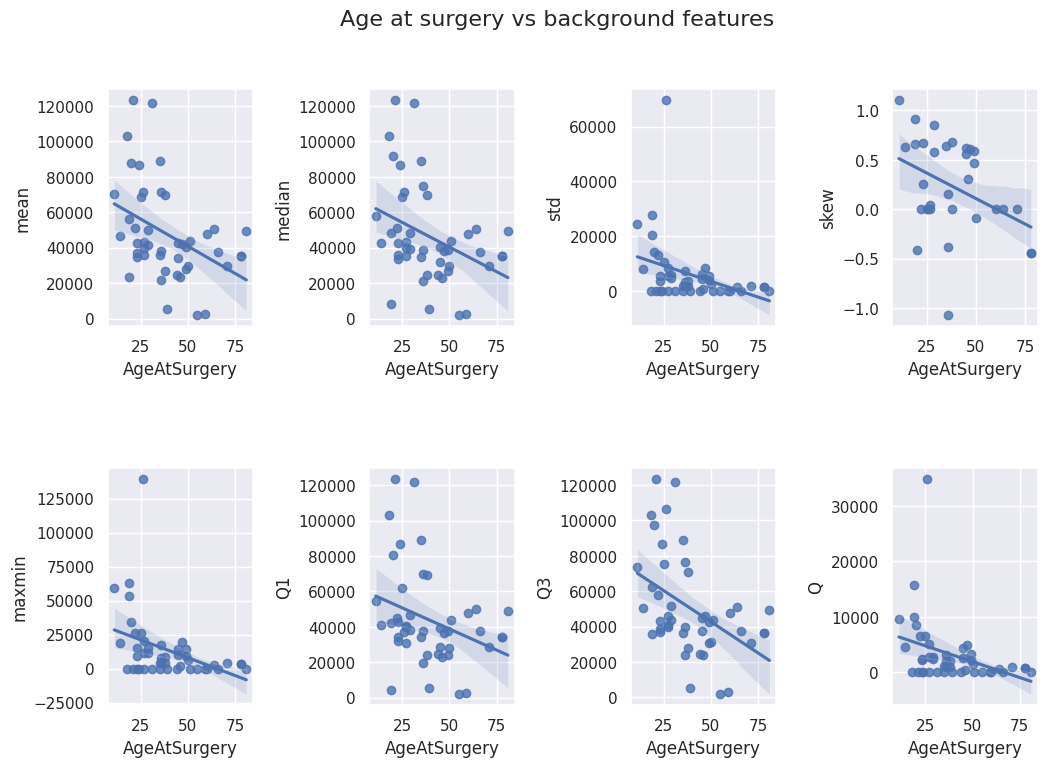

In [21]:
sns.set_theme(rc={'figure.figsize':(12,8)})
fig, axs = plt.subplots(ncols=4, nrows=2)
for i in range(0,8):
    i_x = i // 4
    i_y = i % 4
    x_name = corr_background['Patient_ft'].values[i+3]
    y_name = corr_background['Cell_ft'].values[i+3]
    sns.regplot(x=x_name, y=y_name, data=pac_outcomes_bck, ax=axs[i_x,i_y])

plt.subplots_adjust(wspace=0.8, hspace=0.6)
fig.suptitle('Age at surgery vs background features', fontsize=16)
plt.show()

In [22]:
corr_distances

,Patient_ft,Cell_ft,pearson_corr_coef,p_value
5,AgeAtDiagnosis,skew,-0.375882,0.011920
15,AgeAtSurgery,skew,-0.354447,0.015655
32,Early_rec_withOUTi2ab_15mo,var,-0.368320,0.038062
33,Early_rec_withOUTi2ab_15mo,std,-0.373700,0.035129
39,Early_rec_withOUTi2ab_15mo,Q,-0.415742,0.017959
42,Early_rec_WITHi2ab_15mo,var,-0.368320,0.038062
43,Early_rec_WITHi2ab_15mo,std,-0.373700,0.035129
49,Early_rec_WITHi2ab_15mo,Q,-0.415742,0.017959


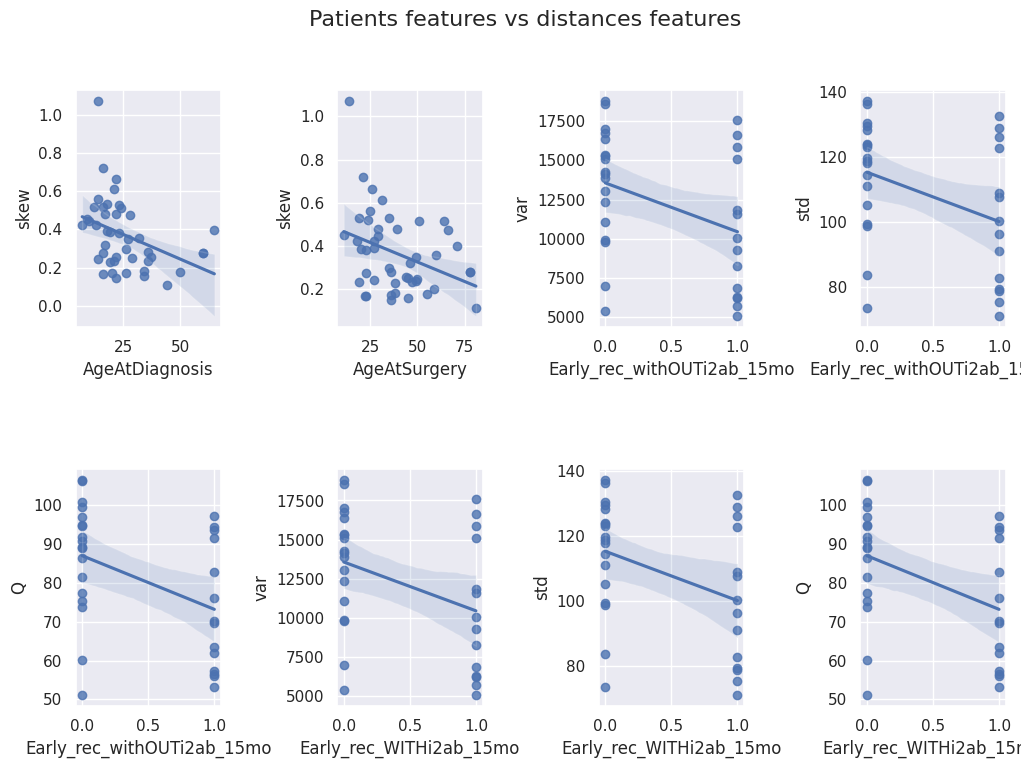

In [23]:
sns.set_theme(rc={'figure.figsize':(12,8)})
fig, axs = plt.subplots(ncols=4, nrows=2)
for i in range(0,8):
    i_x = i // 4
    i_y = i % 4
    x_name = corr_distances['Patient_ft'].values[i]
    y_name = corr_distances['Cell_ft'].values[i]
    sns.regplot(x=x_name, y=y_name, data=pac_outcomes_dist, ax=axs[i_x,i_y])

plt.subplots_adjust(wspace=0.8, hspace=0.6)
fig.suptitle('Patients features vs distances features', fontsize=16)
plt.show()

In [24]:
corr_flatness

,Patient_ft,Cell_ft,pearson_corr_coef,p_value
36,Early_rec_withOUTi2ab_15mo,maxmin,-0.419171,0.01694
46,Early_rec_WITHi2ab_15mo,maxmin,-0.419171,0.01694
51,Any_rec_withOUT_i2ab_6mo,median,0.325960,0.04011
61,Any_rec_WITH_i2ab_6mo,median,0.325960,0.04011


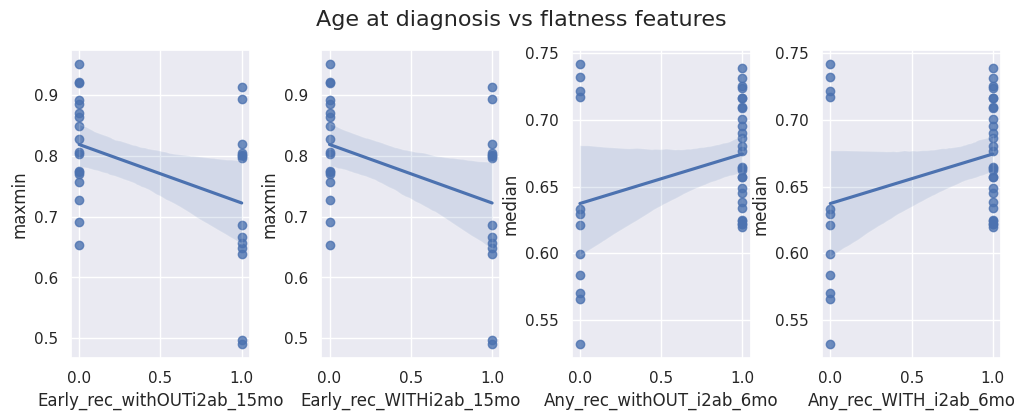

In [25]:
sns.set_theme(rc={'figure.figsize':(12,4)})
fig, axs = plt.subplots(ncols=4, nrows=1)
for i in range(0,4):
    x_name = corr_flatness['Patient_ft'].values[i]
    y_name = corr_flatness['Cell_ft'].values[i]
    sns.regplot(x=x_name, y=y_name, data=pac_outcomes_flat, ax=axs[i])

plt.subplots_adjust(wspace=0.4, hspace=0.6)
fig.suptitle('Age at diagnosis vs flatness features', fontsize=16)
plt.show()

# Wilcoxon rank sum test:
Tests the null hypothesis that data in x and y are samples from continuous distributions with equal medians, against the alternative that they are not

examination of groups WITH/OUT/SEX/RECURRENT SURGERY

In [26]:
pac_ft = pac_outcomes_area[[ 'AgeAtDiagnosis','AgeAtSurgery', 'Surgery_No', 'Early_rec_withOUTi2ab_15mo', 'Early_rec_WITHi2ab_15mo', 'Any_rec_withOUT_i2ab_6mo', 'Any_rec_WITH_i2ab_6mo', 'RecurrentSurgery']]
pac_ft_arr = pac_outcomes_area[[ 'mean','median', 'var', 'std', 'kurt', 'skew', 'maxmin', 'Q1', 'Q3', 'Q']]
pac_ft_bck = pac_outcomes_bck[[ 'mean','median', 'var', 'std', 'kurt', 'skew', 'maxmin', 'Q1', 'Q3', 'Q']]
pac_ft_dst = pac_outcomes_dist[[ 'mean','median', 'var', 'std', 'kurt', 'skew', 'maxmin', 'Q1', 'Q3', 'Q']]
pac_ft_flt = pac_outcomes_flat[[ 'mean','median', 'var', 'std', 'kurt', 'skew', 'maxmin', 'Q1', 'Q3', 'Q']]


In [27]:
column_names = [ 'area_mean','area_median', 'area_var', 'area_std', 'area_kurt', 'area_skew', 'area_maxmin', 'area_Q1', 'area_Q3', 'area_Q',
                 'background_mean','background_median', 'background_var', 'background_std', 'background_kurt', 'background_skew', 'background_maxmin', 'background_Q1', 'background_Q3', 'background_Q',
                 'distance_mean','distance_median', 'distance_var', 'distance_std', 'distance_kurt', 'distance_skew', 'distance_maxmin', 'distance_Q1', 'distance_Q3', 'distance_Q',
                 'flatness_mean','flatness_median', 'flatness_var', 'flatness_std', 'flatness_kurt', 'flatness_skew', 'flatness_maxmin', 'flatness_Q1', 'flatness_Q3', 'flatness_Q']

In [28]:
Sex_ft, Early_rec_withOUTi2ab_15mo_ft, Early_rec_WITHi2ab_15mo_ft, Any_rec_withOUT_i2ab_6mo_ft, Any_rec_WITH_i2ab_6mo_ft, RecurrentSurgery_ft = pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame()
Sex_ft['Sex'] = pac_outcomes_area['Sex']
Early_rec_withOUTi2ab_15mo_ft['Early_rec_withOUTi2ab_15mo'] = pac_outcomes_area['Early_rec_withOUTi2ab_15mo']
Early_rec_WITHi2ab_15mo_ft['Early_rec_WITHi2ab_15mo'] = pac_outcomes_area['Early_rec_WITHi2ab_15mo']
Any_rec_withOUT_i2ab_6mo_ft['Any_rec_withOUT_i2ab_6mo'] = pac_outcomes_area['Any_rec_withOUT_i2ab_6mo']
Any_rec_WITH_i2ab_6mo_ft['Any_rec_WITH_i2ab_6mo'] = pac_outcomes_area['Any_rec_WITH_i2ab_6mo']
RecurrentSurgery_ft['RecurrentSurgery'] = pac_outcomes_area['RecurrentSurgery']

In [29]:
def put_vals_in_columns(df, column_names, pac_ft_arr, pac_ft_bck, pac_ft_dst, pac_ft_flt):
    cols_area, cols_bck, cols_bck, cols_flt =  pac_ft_arr.columns.tolist(), pac_ft_bck.columns.tolist(), pac_ft_dst.columns.tolist(), pac_ft_flt.columns.tolist()
    for i in range(0,10):
        df[column_names[i]] = pac_ft_arr[cols_area[i]]
    for i in range(0,10):
        df[column_names[i+10]] = pac_ft_bck[cols_bck[i]]
    for i in range(0,10):
        df[column_names[i+20]] = pac_ft_dst[cols_bck[i]]
    for i in range(0,10):
        df[column_names[i+30]] = pac_ft_flt[cols_flt[i]]

    return df

In [30]:
Sex_ft = put_vals_in_columns(Sex_ft, column_names, pac_ft_arr, pac_ft_bck, pac_ft_dst, pac_ft_flt)
Early_rec_withOUTi2ab_15mo_ft = put_vals_in_columns(Early_rec_withOUTi2ab_15mo_ft, column_names, pac_ft_arr, pac_ft_bck, pac_ft_dst, pac_ft_flt)
Early_rec_WITHi2ab_15mo_ft = put_vals_in_columns(Early_rec_WITHi2ab_15mo_ft, column_names, pac_ft_arr, pac_ft_bck, pac_ft_dst, pac_ft_flt)
Any_rec_withOUT_i2ab_6mo_ft = put_vals_in_columns(Any_rec_withOUT_i2ab_6mo_ft, column_names, pac_ft_arr, pac_ft_bck, pac_ft_dst, pac_ft_flt)
Any_rec_WITH_i2ab_6mo_ft = put_vals_in_columns(Any_rec_WITH_i2ab_6mo_ft, column_names, pac_ft_arr, pac_ft_bck, pac_ft_dst, pac_ft_flt)
RecurrentSurgery_ft = put_vals_in_columns(RecurrentSurgery_ft, column_names, pac_ft_arr, pac_ft_bck, pac_ft_dst, pac_ft_flt)

In [31]:
def ranksum_columnwise(group1, group2):
    results = []
    col_names = group1.columns.tolist()
    for c in range(1,len(col_names)):
            column = col_names[c]
            x = group1[column]
            y = group2[column]
            wilcox_result = ranksums(x, y)
            results.append({'Ft_name': column,
                            'statistic': wilcox_result[0],
                             'p_value':  wilcox_result[1]})
    return pd.DataFrame(results)

In [32]:
def check_ranksum_pval(df, col, c1, c2, alpha):
    df1 = df[df[col]==c1]
    df2 = df[df[col]==c2]
    stats =  ranksum_columnwise(df1, df2)
    stats = stats[stats['p_value']<alpha]
    return stats

In [33]:
sex_stats = check_ranksum_pval(Sex_ft, 'Sex', 1, 2, alpha)
sex_stats.head()

,Ft_name,statistic,p_value


In [34]:
Early_rec_withOUTi2ab_15mo_ft_stats = check_ranksum_pval(Early_rec_withOUTi2ab_15mo_ft, 'Early_rec_withOUTi2ab_15mo', 0, 1, alpha)
Early_rec_withOUTi2ab_15mo_ft_stats.head()

,Ft_name,statistic,p_value
17,background_Q1,2.127264,0.033398
18,background_Q3,2.051290,0.040239
29,distance_Q,2.203238,0.027578
36,flatness_maxmin,2.089277,0.036683


In [35]:
Early_rec_WITHi2ab_15mo_ft_stats = check_ranksum_pval(Early_rec_WITHi2ab_15mo_ft, 'Early_rec_WITHi2ab_15mo', 0, 1, alpha)
Early_rec_WITHi2ab_15mo_ft_stats.head()

,Ft_name,statistic,p_value
17,background_Q1,2.127264,0.033398
18,background_Q3,2.051290,0.040239
29,distance_Q,2.203238,0.027578
36,flatness_maxmin,2.089277,0.036683


In [36]:
Any_rec_withOUT_i2ab_6mo_ft_stats = check_ranksum_pval(Any_rec_withOUT_i2ab_6mo_ft, 'Any_rec_withOUT_i2ab_6mo', 0, 1, alpha)
Any_rec_withOUT_i2ab_6mo_ft_stats.head()

,Ft_name,statistic,p_value
10,background_mean,2.184041,0.028959
11,background_median,2.065985,0.038830
17,background_Q1,2.036471,0.041703
18,background_Q3,2.213555,0.026859


In [37]:
Any_rec_WITH_i2ab_6mo_ft_stats = check_ranksum_pval(Any_rec_WITH_i2ab_6mo_ft, 'Any_rec_WITH_i2ab_6mo', 0, 1, alpha)
Any_rec_WITH_i2ab_6mo_ft_stats.head()

,Ft_name,statistic,p_value
10,background_mean,2.184041,0.028959
11,background_median,2.065985,0.038830
17,background_Q1,2.036471,0.041703
18,background_Q3,2.213555,0.026859


In [38]:
RecurrentSurgery_ft_stats = check_ranksum_pval(RecurrentSurgery_ft, 'RecurrentSurgery', 0, 1, alpha)
RecurrentSurgery_ft_stats.head()

,Ft_name,statistic,p_value


# Clustergram

In [39]:
!pip install dash_bio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 34.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 64.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 49.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 97.9 MB/s eta 0:00:00
  Created wheel for dash_bio: filename=dash_bio-1.0.2-py3-none-any.whl size=10338086 sha256=b53189b794bcc7c4aab426968aa1e1be56e0f6efd7f3adbdaa7984214a624df5
  Stored in directory: /root/.cache/pip/wheels/cb/97/9c/49463914611cb715a46d21a3896d9a886318ea0c451e840196
  Created wheel for parmed: filename=ParmEd-4.2.2-cp310-cp310-linux_x86_64.whl size=19468079 sha256=11a69335161db7ac982db512099f39b0d191cbd241fada36e1ca022035d16e04
  Stored in directory: /root/.cache/pip/wheels/a3

In [40]:
!pip install clustergram

In [41]:
!pip install urbangrammar_graphics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 62.2 MB/s eta 0:00:00


In [42]:
import dash_bio
from clustergram import Clustergram
import urbangrammar_graphics as ugg

In [66]:
def plot_clusterization(df, name_to_drop):
  df = df.dropna()
  df_dropped = df.drop([name_to_drop], axis=1)
  # Tree clustergram
  cgram = Clustergram(range(1,10), n_init=100)
  cgram.fit(df_dropped)
  ax = cgram.plot(
      figsize=(10, 8),
      line_style=dict(color=ugg.COLORS[1]),
      cluster_style={"color": ugg.COLORS[2]},
  )
  ax.yaxis.grid(False)
  sns.despine(offset=10)
  ax.set_title('K-Means')

  # Plot pairs
  g = sns.pairplot(df, hue=name_to_drop, palette=ugg.COLORS[1:3])
  g.fig.suptitle(name_to_drop)


Clusterization plots


K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.112 seconds.
K=3 fitted in 0.078 seconds.
K=4 fitted in 0.112 seconds.
K=5 fitted in 0.112 seconds.
K=6 fitted in 0.131 seconds.
K=7 fitted in 0.147 seconds.
K=8 fitted in 0.158 seconds.
K=9 fitted in 0.174 seconds.


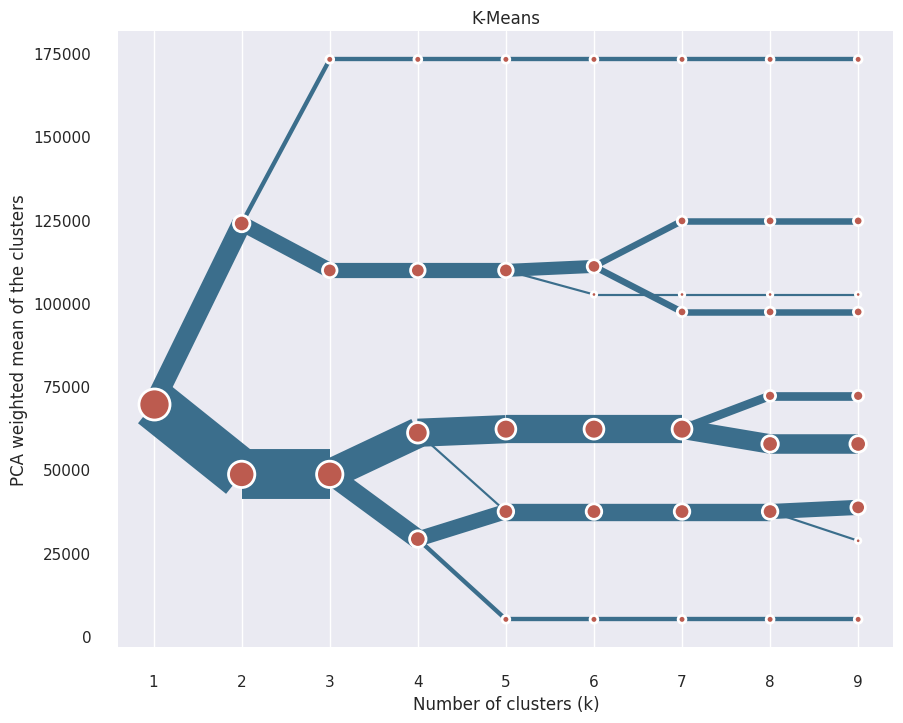

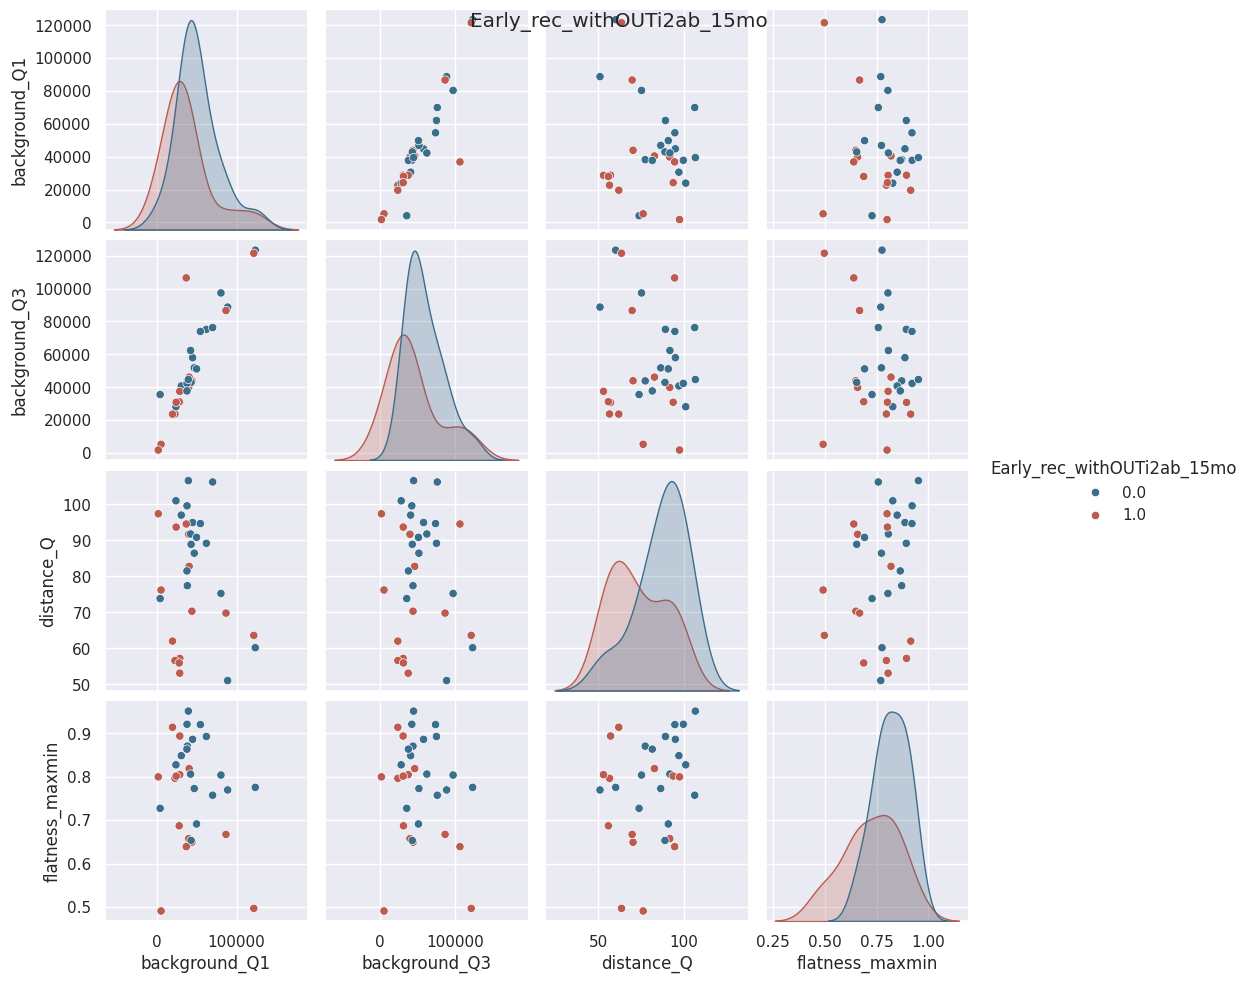

In [72]:
df_earlyrecOUT = Early_rec_withOUTi2ab_15mo_ft[['Early_rec_withOUTi2ab_15mo', 'background_Q1', 'background_Q3', 'distance_Q', 'flatness_maxmin']]
plot_clusterization(df=df_earlyrecOUT, name_to_drop='Early_rec_withOUTi2ab_15mo')

In [73]:
df_dropped = df_earlyrecOUT.dropna().drop(['Early_rec_withOUTi2ab_15mo'], axis=1)
# Heatmap
dash_bio.Clustergram(
      data=df_dropped,
      column_labels=list(df_dropped.columns.values),
      row_labels=list(df_dropped.index),
      height=800,
      width=1000,
      line_width=2
)

K=1 skipped. Mean computed from data directly.
K=2 fitted in 2.034 seconds.
K=3 fitted in 1.952 seconds.
K=4 fitted in 1.599 seconds.
K=5 fitted in 0.750 seconds.
K=6 fitted in 1.589 seconds.
K=7 fitted in 0.145 seconds.
K=8 fitted in 0.762 seconds.
K=9 fitted in 1.193 seconds.


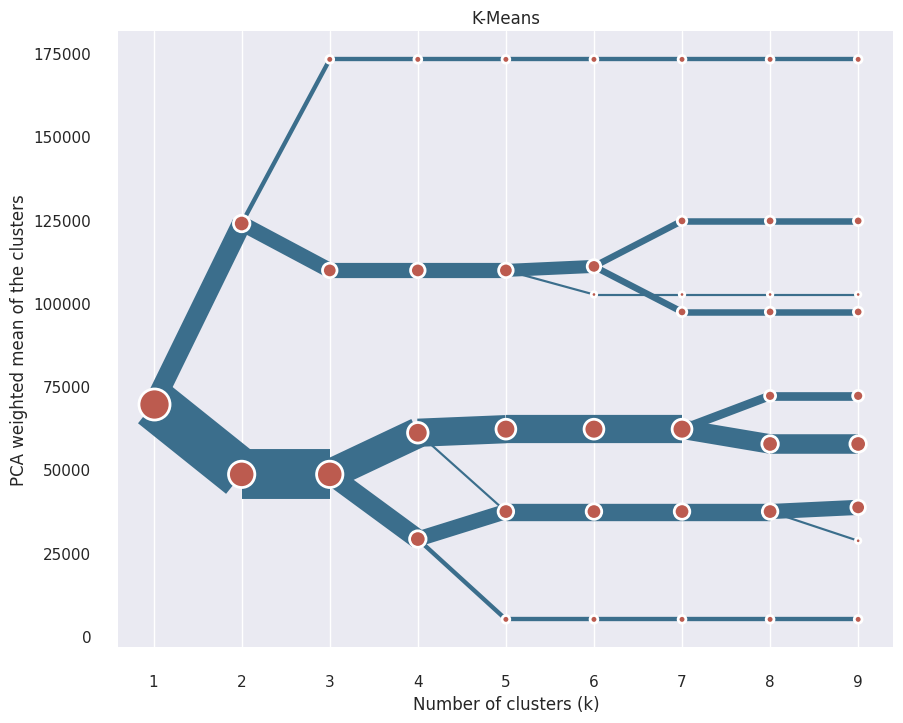

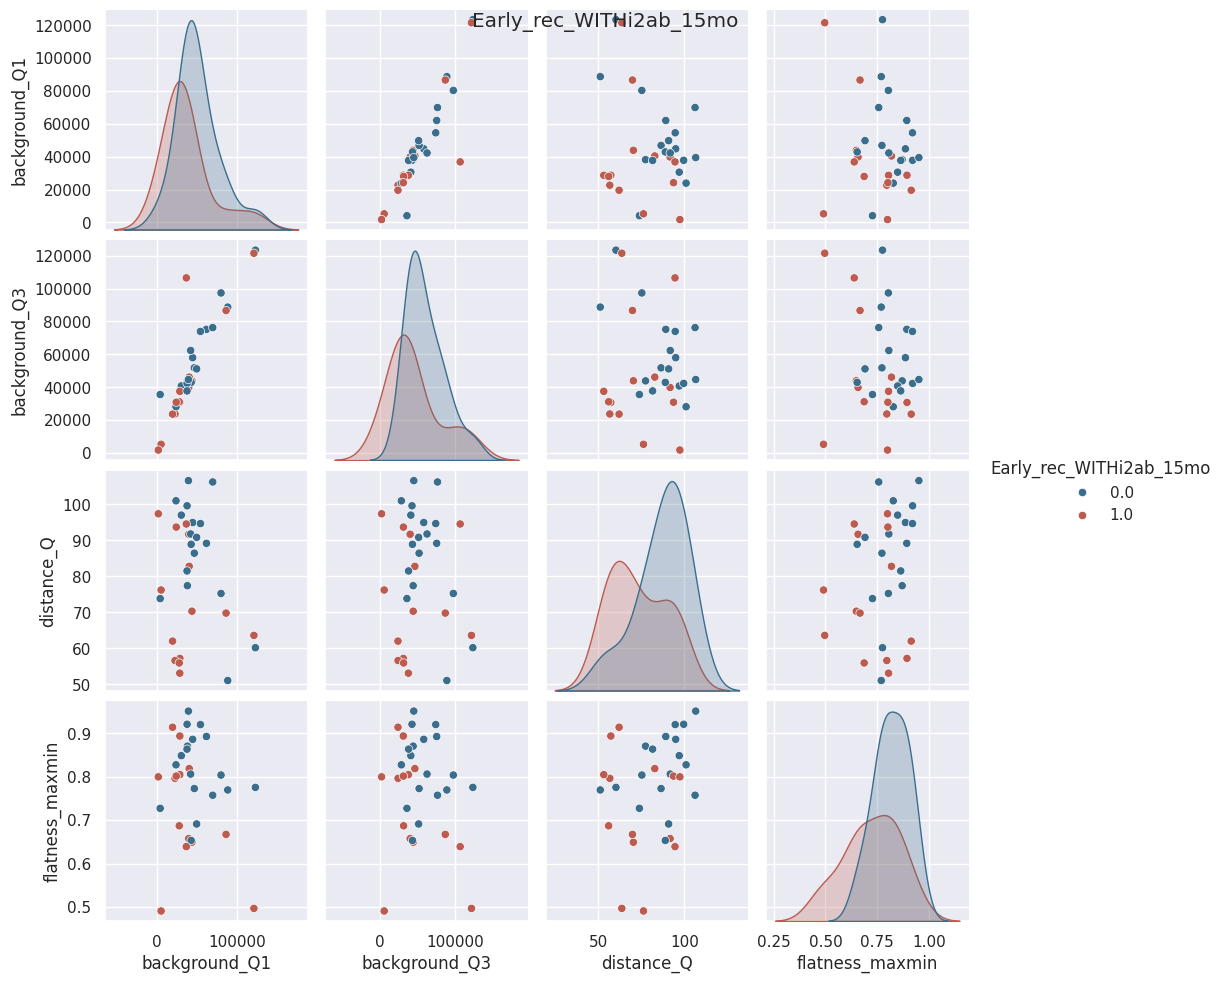

In [74]:
df_earlyrecWITH = Early_rec_WITHi2ab_15mo_ft[['Early_rec_WITHi2ab_15mo', 'background_Q1', 'background_Q3', 'distance_Q', 'flatness_maxmin']]
plot_clusterization(df=df_earlyrecWITH, name_to_drop='Early_rec_WITHi2ab_15mo')


In [75]:
df_dropped = df_earlyrecWITH.dropna().drop(['Early_rec_WITHi2ab_15mo'], axis=1)
# Heatmap
dash_bio.Clustergram(
      data=df_dropped,
      column_labels=list(df_dropped.columns.values),
      row_labels=list(df_dropped.index),
      height=800,
      width=1000,
      line_width=2
)

K=1 skipped. Mean computed from data directly.
K=2 fitted in 0.770 seconds.
K=3 fitted in 1.106 seconds.
K=4 fitted in 1.019 seconds.
K=5 fitted in 1.863 seconds.
K=6 fitted in 1.605 seconds.
K=7 fitted in 1.805 seconds.
K=8 fitted in 0.637 seconds.
K=9 fitted in 0.670 seconds.


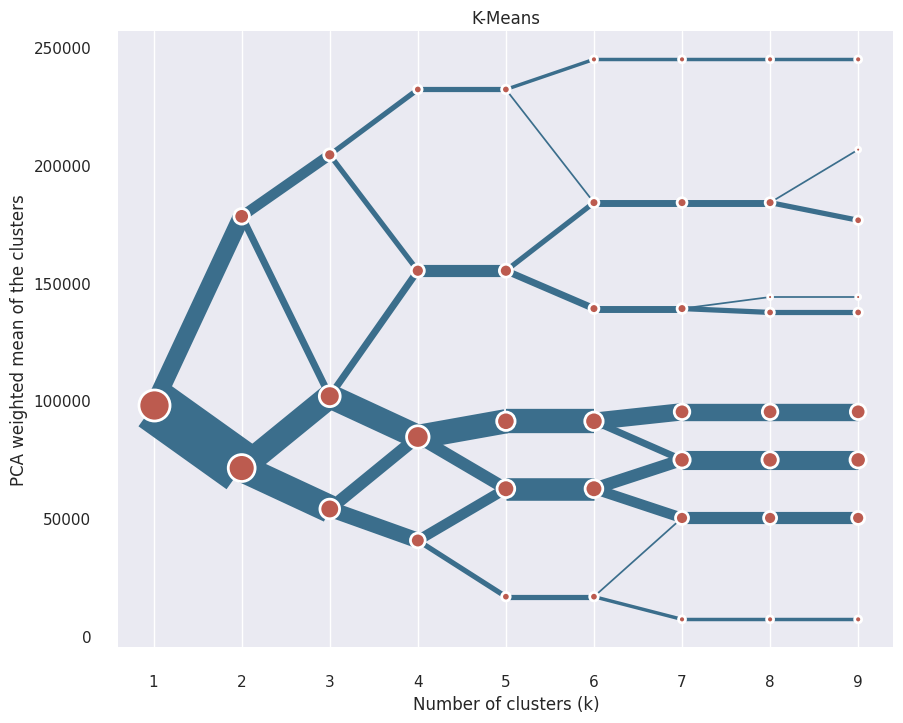

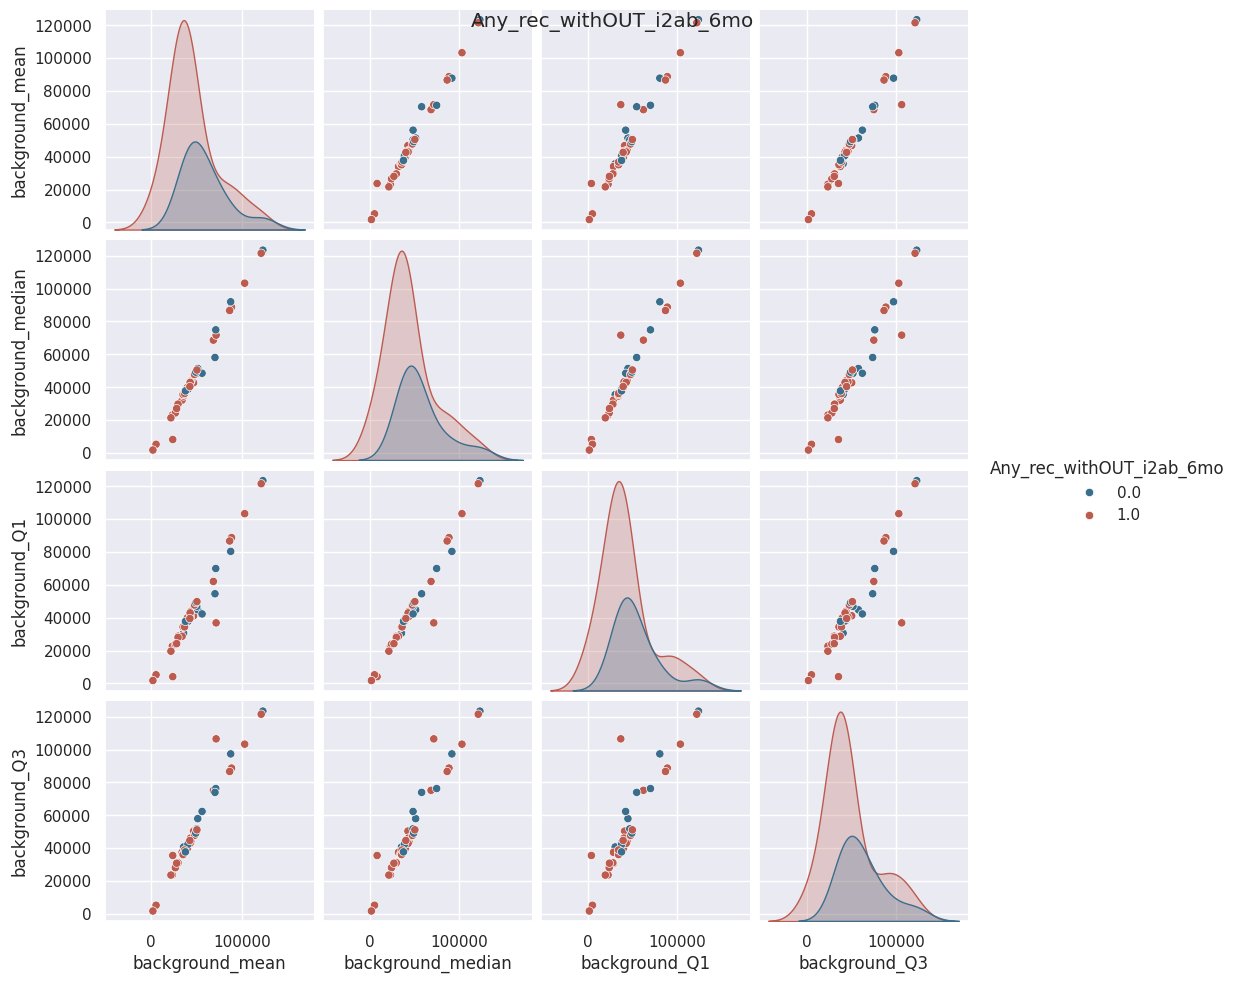

In [79]:
df_anyrecOUT = Any_rec_withOUT_i2ab_6mo_ft[['Any_rec_withOUT_i2ab_6mo', 'background_mean', 'background_median', 'background_Q1', 'background_Q3']]
plot_clusterization(df=df_anyrecOUT, name_to_drop='Any_rec_withOUT_i2ab_6mo')

In [80]:
df_dropped = df_anyrecOUT.dropna().drop(['Any_rec_withOUT_i2ab_6mo'], axis=1)
# Heatmap
dash_bio.Clustergram(
      data=df_dropped,
      column_labels=list(df_dropped.columns.values),
      row_labels=list(df_dropped.index),
      height=800,
      width=1000,
      line_width=2
)

K=1 skipped. Mean computed from data directly.
K=2 fitted in 1.581 seconds.
K=3 fitted in 1.068 seconds.
K=4 fitted in 0.563 seconds.
K=5 fitted in 0.132 seconds.
K=6 fitted in 0.136 seconds.
K=7 fitted in 0.144 seconds.
K=8 fitted in 0.160 seconds.
K=9 fitted in 0.173 seconds.


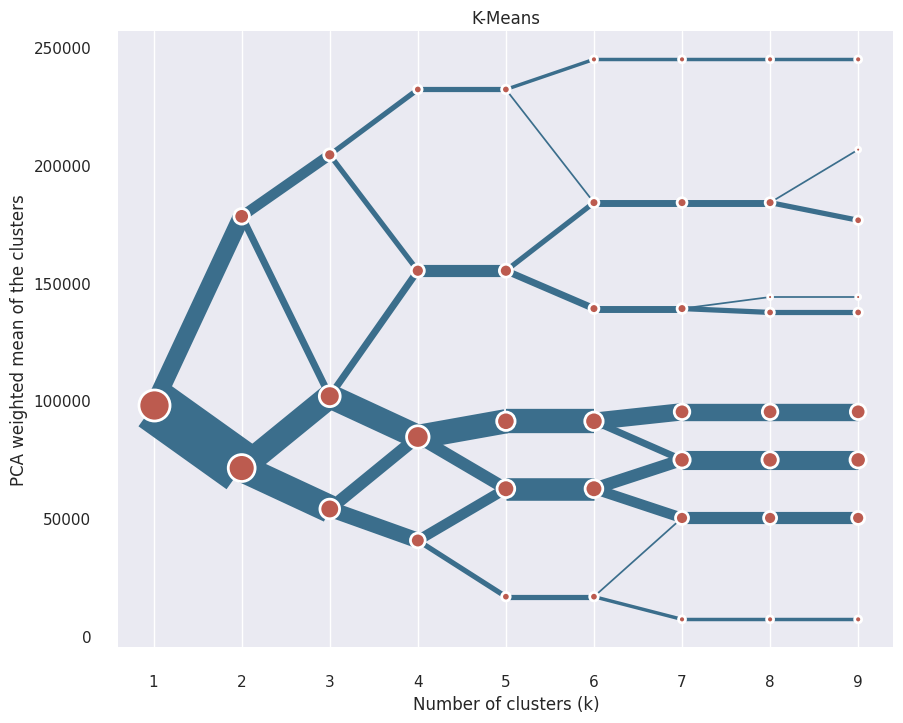

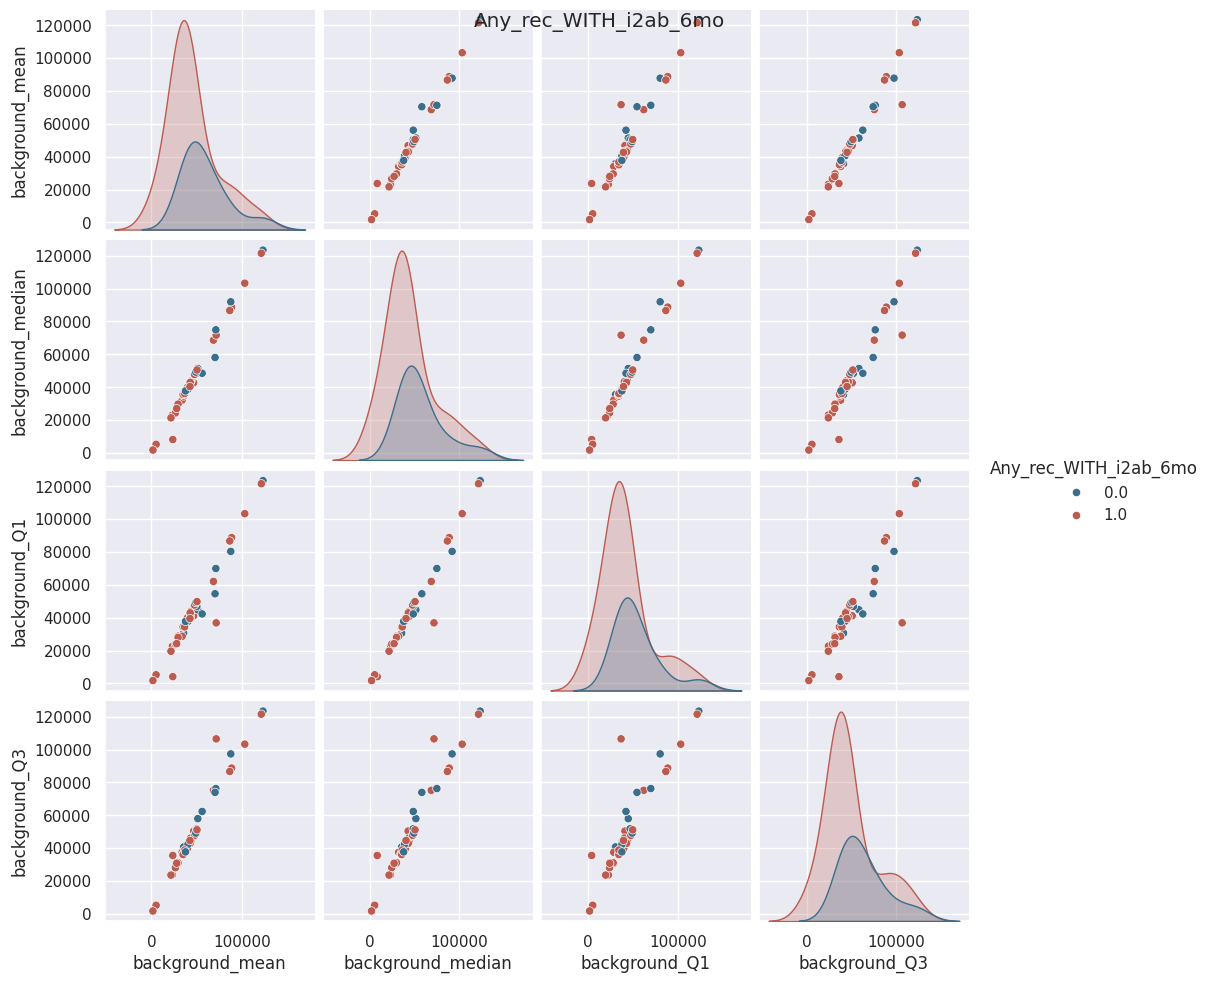

In [81]:
df_anyrecWITH = Any_rec_WITH_i2ab_6mo_ft[['Any_rec_WITH_i2ab_6mo', 'background_mean', 'background_median', 'background_Q1', 'background_Q3']]
plot_clusterization(df_anyrecWITH, 'Any_rec_WITH_i2ab_6mo')

In [82]:
df_dropped = df_anyrecWITH.dropna().drop(['Any_rec_WITH_i2ab_6mo'], axis=1)
# Heatmap
dash_bio.Clustergram(
      data=df_dropped,
      column_labels=list(df_dropped.columns.values),
      row_labels=list(df_dropped.index),
      height=800,
      width=1000,
      line_width=2
)